In [1]:
import pandas as pd
from neuralprophet.neural_prophet import NeuralProphet

In [2]:
df = pd.read_csv('../example_data/example_wp_log_peyton_manning.csv')

# Minimal

In [3]:
m = NeuralProphet()
metrics = m.fit(df)
future = m.make_future_dataframe(df, future_periods=365)

Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


In [4]:
forecast = m.predict(future)

# More

In [5]:
# split manually
m = NeuralProphet()
df_train, df_val = m.split_df(df, valid_p=0.2)
train_metrics = m.fit(df_train)
val_metrics = m.test(df_val)

Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


In [7]:
# or evaluate while training
m = NeuralProphet()
metrics = m.fit(df, validate_each_epoch=True, valid_p=0.2)
metrics.tail()

Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


,SmoothL1Loss,MAE,RegLoss,SmoothL1Loss_val,MAE_val
35,0.163102,0.371323,0.0,0.485371,0.779465
36,0.161851,0.369609,0.0,0.368921,0.648736
37,0.161122,0.369219,0.0,0.366328,0.648230
38,0.168598,0.376638,0.0,0.348269,0.627886
39,0.167961,0.375777,0.0,0.362161,0.642699


In [8]:
# These are all the components contained in the forecast df
future = m.make_future_dataframe(df, future_periods=10, n_historic_predictions=10)
forecast = m.predict(future)
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2016-01-11,8.470730,9.836122,1.365391,0.273106,1.058824,0.309403
1,2016-01-12,8.135054,9.499228,1.364175,0.273482,1.061570,-0.030612
2,2016-01-13,8.067149,9.524586,1.457437,0.273859,1.062133,-0.006193
3,2016-01-14,8.023552,9.484329,1.460777,0.274235,1.060419,-0.045113
4,2016-01-15,8.021913,9.557177,1.535264,0.274612,1.056351,0.031425


In [9]:
df2 = df.copy(deep=True)
df2['A'] = df['y'].rolling(30, min_periods=1).mean()

In [14]:
# adding an extra covariate
m = NeuralProphet(n_lags=10, n_forecasts=10)
m = m.add_covariate(name='A')
# then proceed as usual
m.fit(df2)
future = m.make_future_dataframe(df2)
forecast = m.predict(future)

Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


In [15]:
# adding a scalar regressor
m = NeuralProphet(n_lags=10, n_forecasts=10)
m = m.add_regressor(name='A', known_in_advance=False)
# then proceed as usual
m.fit(df2)
future = m.make_future_dataframe(df2)
forecast = m.predict(future)

Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


# Plotting

Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


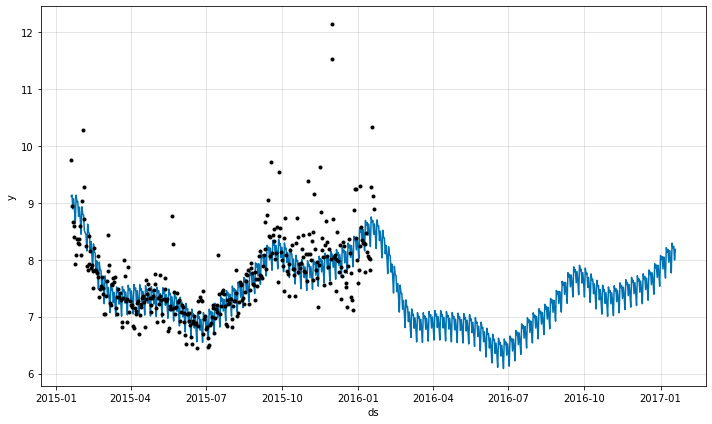

In [20]:
# linear time-dependent model
m = NeuralProphet()
metrics = m.fit(df)
future = m.make_future_dataframe(df, future_periods=365)
forecast = m.predict(future)
fig_fcst = m.plot(forecast[-730:])

Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


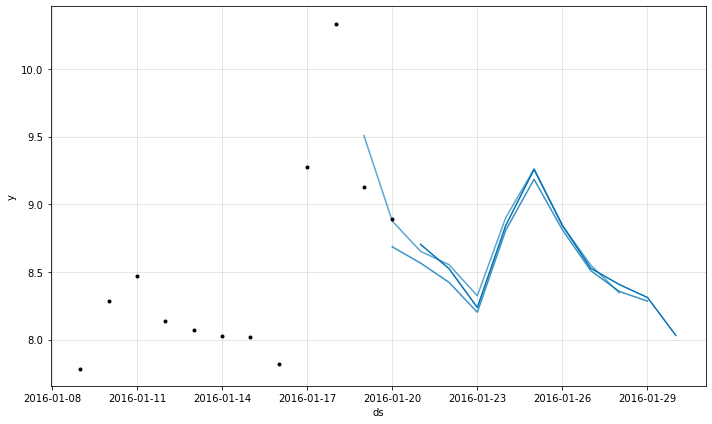

In [27]:
# get most recent forecast for AR / lagged model
m = NeuralProphet(n_lags=10, n_forecasts=10)
metrics = m.fit(df)
future = m.make_future_dataframe(df, n_historic_predictions=len(df))
forecast = m.predict(future)
fig_fcst = m.plot_last_forecast(forecast, include_previous_forecasts=2)

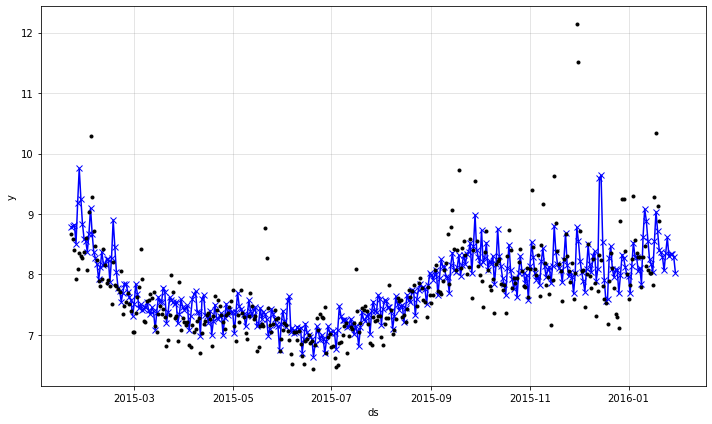

In [33]:
m.highlight_nth_step_ahead_of_each_forecast(10)
fig_fit = m.plot(forecast[-375:])

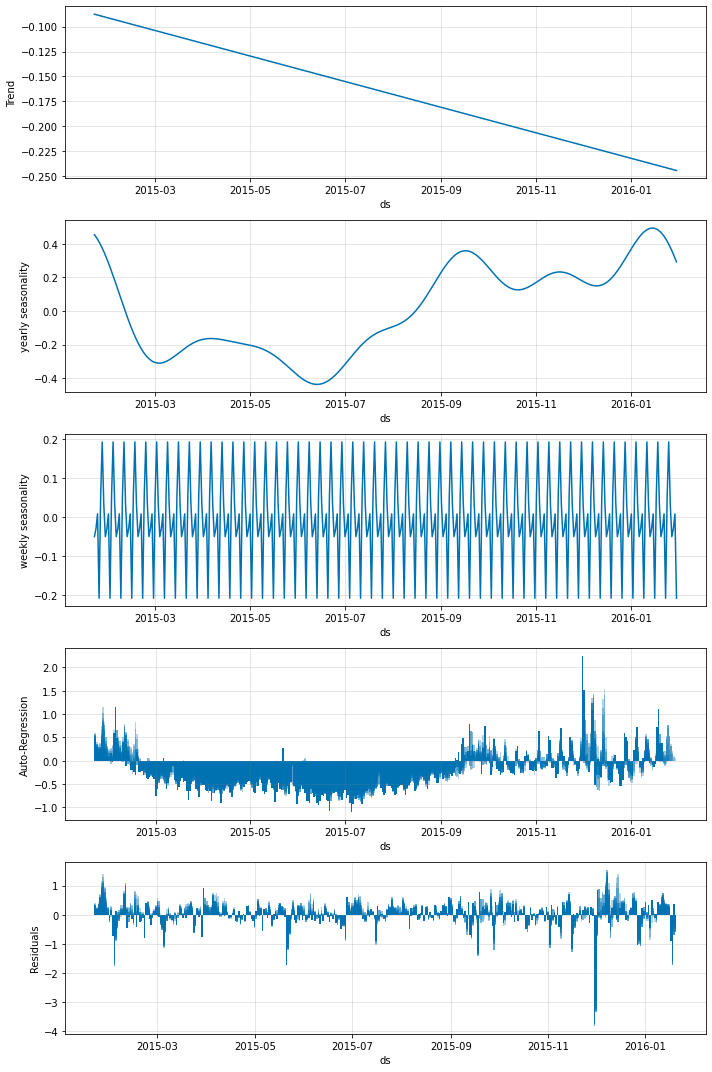

In [34]:
m.highlight_nth_step_ahead_of_each_forecast(None)
fig_comp = m.plot_components(forecast[-375:])

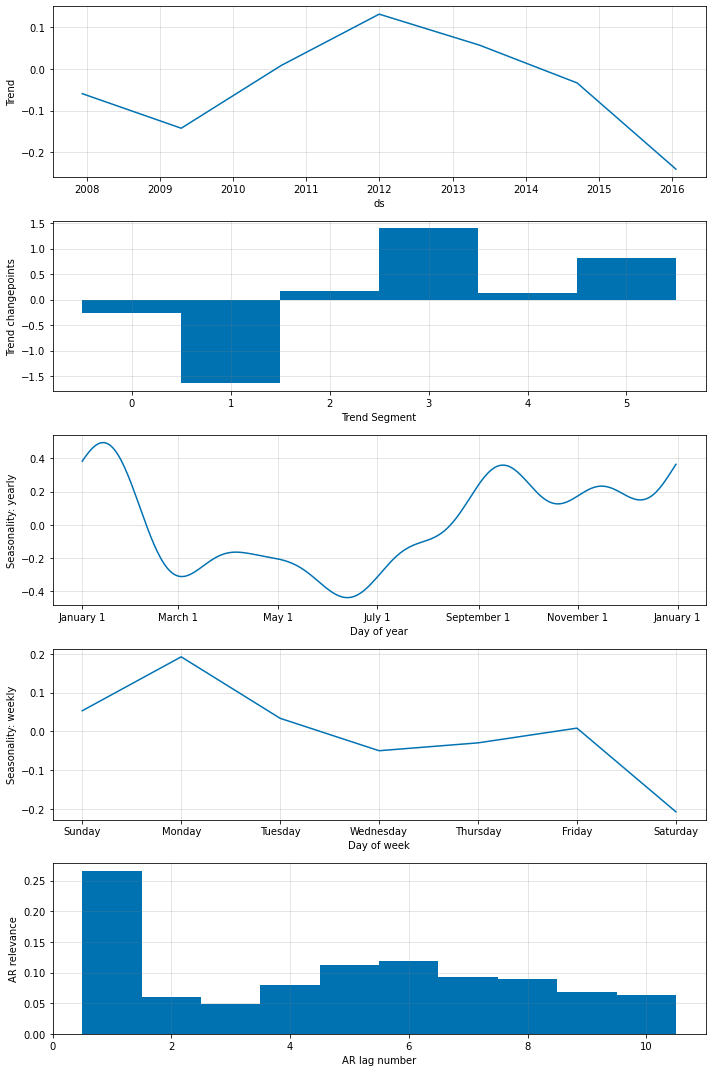

In [32]:
fig_comp = m.plot_parameters()

# Seasonality

In [17]:
m = NeuralProphet(
    yearly_seasonality=16,
    weekly_seasonality=8,
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    seasonality_reg=10,
)

NOTICE: A Regularization strength for the seasonal Fourier Terms was set.Please note that this feature is experimental.


# Trend

In [18]:
m = NeuralProphet(
    n_changepoints=100,
    trend_smoothness=10,
    trend_threshold=True,
)

NOTICE: A numeric value greater than 0 for continuous_trend is interpreted asthe trend changepoint regularization strength. Please note that this feature is experimental.


# Auto-Regression

In [40]:
m = NeuralProphet(
    n_forecasts=30,
    n_lags=60,
    ar_sparsity=0.01,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_changepoints=0,
)

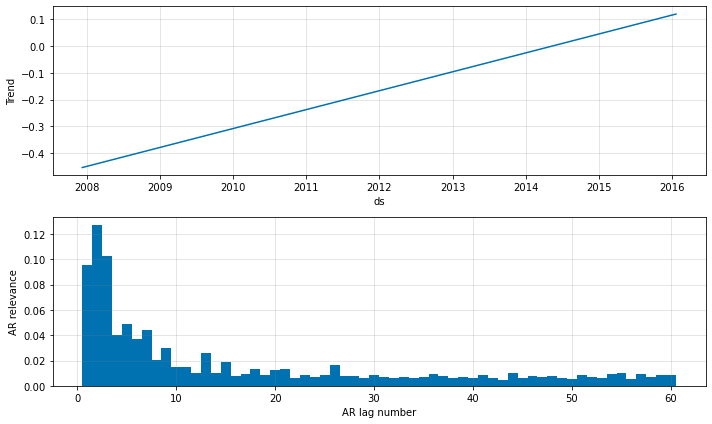

In [41]:
metrics = m.fit(df)
future = m.make_future_dataframe(df, n_historic_predictions=60)
forecast = m.predict(future)
fig_comp = m.plot_parameters()

# Hidden Layers

In [ ]:
m = NeuralProphet(
    n_forecasts=30,
    n_lags=60,
    learning_rate=1.0,
    loss_func='Huber',
    normalize_y=True,
    num_hidden_layers=2,
    d_hidden=64,
)